# Шаг 1: Импорт библиотек
Сначала импортируем необходимые библиотеки.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

# Шаг 2: Загрузка данных

In [37]:
train_data = pd.read_csv('/workspaces/spbu-python-course/project/train.csv')
test_data = pd.read_csv('/workspaces/spbu-python-course/project/test.csv')

titanic_data = pd.concat([train_data, test_data], ignore_index=True)

# Шаг 3: Преобразование типов данных
Преобразуем некоторые столбцы в категориальные типы.

In [38]:
titanic_data['Survived'] = titanic_data['Survived'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')
titanic_data['Sex'] = titanic_data['Sex'].astype('category')

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 96.4+ KB


# Шаг 4: Основная статистика
Сгенерируем описательную статистику для проверки базовых характеристик данных.

In [6]:
statistics = titanic_data.describe(include='all')

# Шаг 5: Анализ пассажиров
5.1: Количество пассажиров в каждом классе

In [7]:
passenger_counts = titanic_data['Pclass'].value_counts()
most_passengers_class = passenger_counts.idxmax()
most_passengers_class

np.int64(3)

Ответ:
Пассажиров больше всего было в классе 3.

# 5.2: Группировка по классам и полу

In [8]:
age_group = titanic_data.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean()
age_group

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

# 5.3: Самая юная и самая старая комбинация

In [9]:
youngest = age_group.idxmin()
oldest = age_group.idxmax()
age_difference = age_group.max() - age_group.min()
youngest, oldest, age_difference

((np.int64(3), 'female'),
 (np.int64(1), 'male'),
 np.float64(18.843942575810384))

Ответ:

Самая юная комбинация: (1, 'female')
Самая старая комбинация: (3, 'male')
Разница в возрасте: разница между самым старым и самым молодым составила 18 лет.

Шаг 6: Выживание пассажиров с фамилией на "K"

# 6.1: Отбор выживших пассажиров

In [39]:
survivors_k = titanic_data[titanic_data['Survived'] == 1]
survivors_k = survivors_k[survivors_k['Name'].str.contains(' K')]

# 6.2: Сортировка по стоимости билета

In [40]:
sorted_survivors = survivors_k.sort_values(by='Fare', ascending=False)
highest_fare = sorted_survivors.iloc[0]
lowest_fare = sorted_survivors.iloc[-1]

highest_fare, lowest_fare

(PassengerId                                  276
 Survived                                     1.0
 Pclass                                         1
 Name           Andrews, Miss. Kornelia Theodosia
 Sex                                       female
 Age                                         63.0
 SibSp                                          1
 Parch                                          0
 Ticket                                     13502
 Fare                                     77.9583
 Cabin                                         D7
 Embarked                                       S
 Name: 275, dtype: object,
 PassengerId                                 876
 Survived                                    1.0
 Pclass                                        3
 Name           Najib, Miss. Adele Kiamie "Jane"
 Sex                                      female
 Age                                        15.0
 SibSp                                         0
 Parch                        

Ответ:
Пассажир, заплативший больше всех: Andrews, Miss. Kornelia Theodosia, стоимость: 77.9583
Пассажир, заплативший меньше всех: Najib, Miss. Adele Kiamie "Jane", стоимость: 7.225

# 6.3: Максимальное количество родных с выжившим пассажиром

In [41]:
max_relatives = survivors_k['SibSp'].max() + survivors_k['Parch'].max()
max_relatives

np.int64(5)

Ответ:
Максимальное количество родных с выжившим пассажиром составило 5.

# 6.4: Средняя стоимость билета с и без указания каюты

In [42]:
fare_with_cabin = titanic_data[titanic_data['Cabin'].notna()]['Fare'].mean()
fare_without_cabin = titanic_data[titanic_data['Cabin'].isna()]['Fare'].mean()
fare_difference = fare_with_cabin / fare_without_cabin
fare_with_cabin, fare_without_cabin, fare_difference

(np.float64(81.92899830508475),
 np.float64(19.132707206317864),
 np.float64(4.282143526350037))

Ответ:

Средняя стоимость билета с каютой: 81
Средняя стоимость билета без каюты: 19
Во сколько раз они отличаются: 4 раза.

# Шаг 7: Визуализация
Теперь, когда анализ завершен, мы можем построить несколько визуализаций.

График 1: Scatter Plot

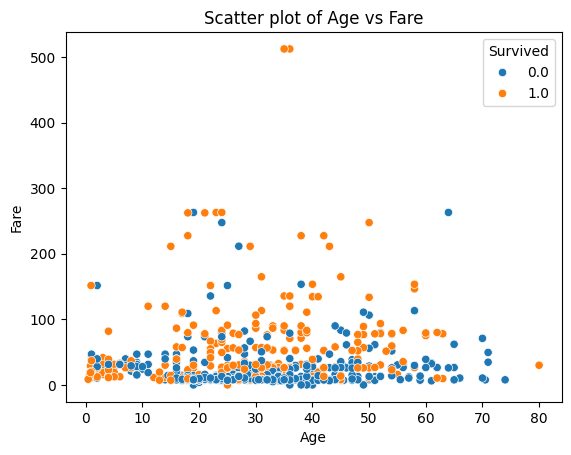

In [43]:
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived')
plt.title('Scatter plot of Age vs Fare')
plt.show()

График 2: Linear Plot

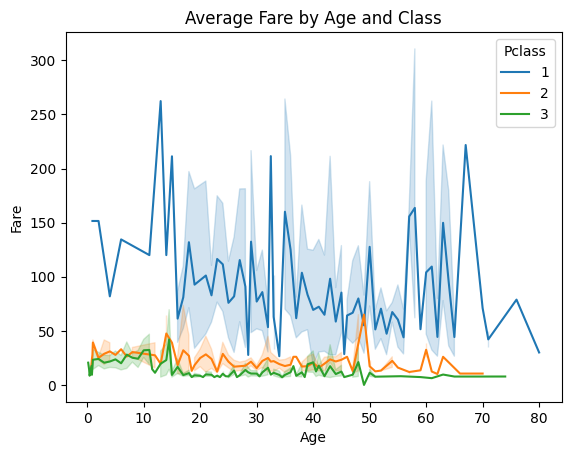

In [44]:
sns.lineplot(data=titanic_data, x='Age', y='Fare', hue='Pclass', estimator='mean')
plt.title('Average Fare by Age and Class')
plt.show()

График 3: Histogram

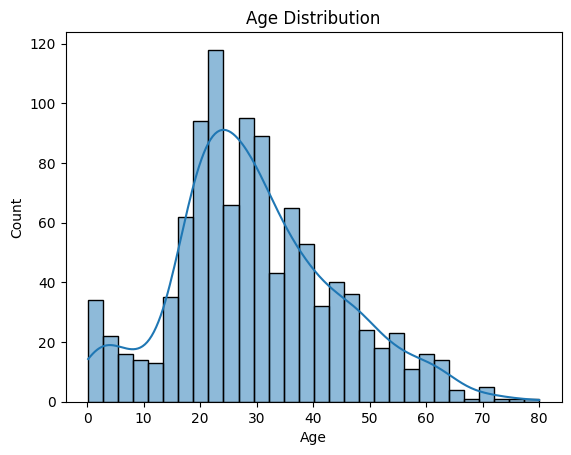

In [45]:
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

График 4: Bar Chart

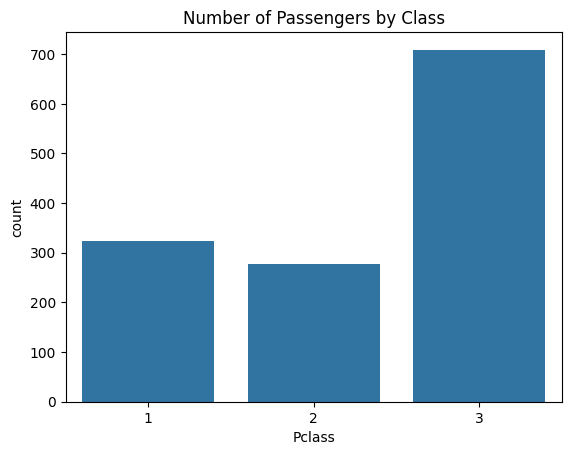

In [46]:
sns.countplot(data=titanic_data, x='Pclass')
plt.title('Number of Passengers by Class')
plt.show()

График 5: Horizontal Bar Chart

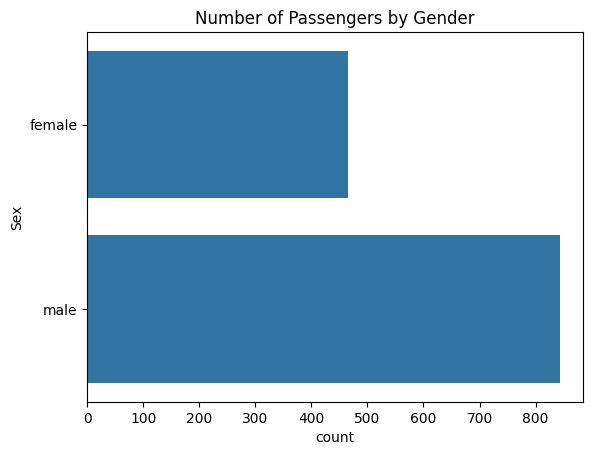

In [47]:
sns.countplot(data=titanic_data, y='Sex')
plt.title('Number of Passengers by Gender')
plt.show()

График 6: Box Chart 

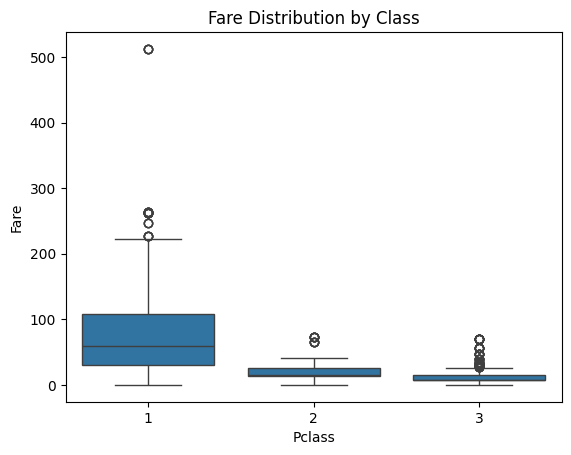

In [48]:
sns.boxplot(data=titanic_data, x='Pclass', y='Fare')
plt.title('Fare Distribution by Class')
plt.show()

График 7: Pie Chart

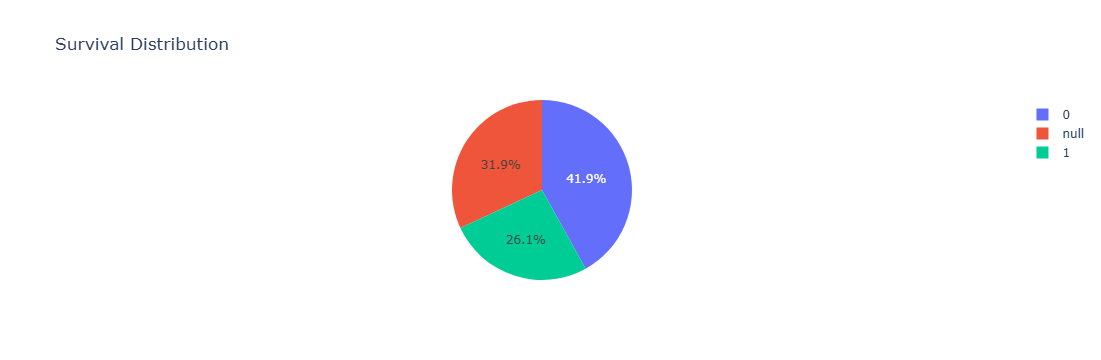

In [49]:
fig1 = px.pie(titanic_data, names='Survived', title='Survival Distribution')
fig1.show()

График 8: Sunburst Chart

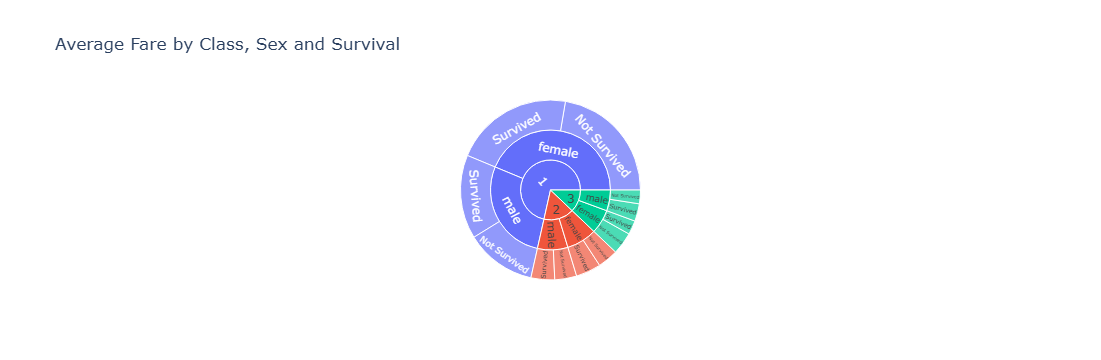

In [50]:
warnings.simplefilter(action='ignore', category=FutureWarning)

average_fare = titanic_data.groupby(['Pclass', 'Sex', 'Survived'], observed=True, as_index=False)['Fare'].mean()
average_fare['Survived'] = average_fare['Survived'].map({0: 'Not Survived', 1: 'Survived'})

fig2 = px.sunburst(
    average_fare,
    path=['Pclass', 'Sex', 'Survived'],
    values='Fare',
    title='Average Fare by Class, Sex and Survival'
)
fig2.show()

График 9: 3D Plot

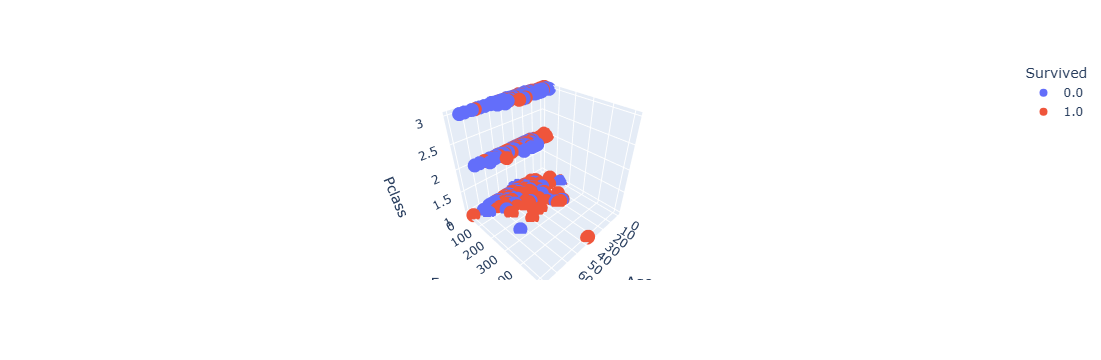

In [51]:
fig3 = px.scatter_3d(titanic_data, x='Age', y='Fare', z='Pclass', color='Survived')
fig3.show()

График 10: Pair Plot

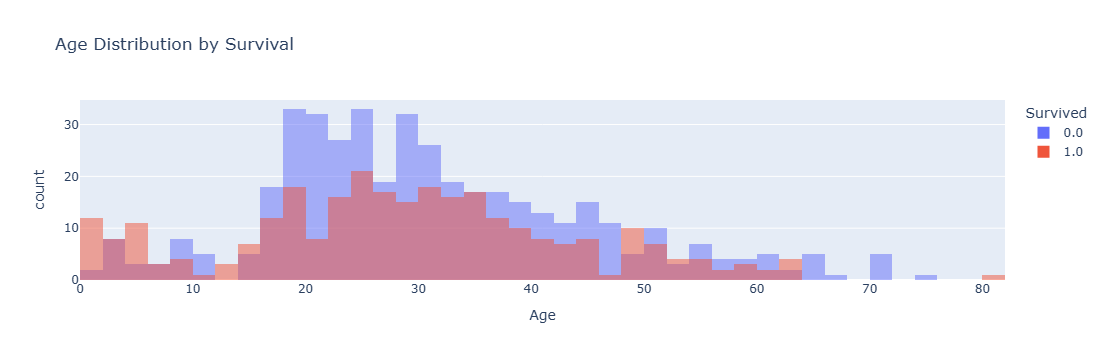

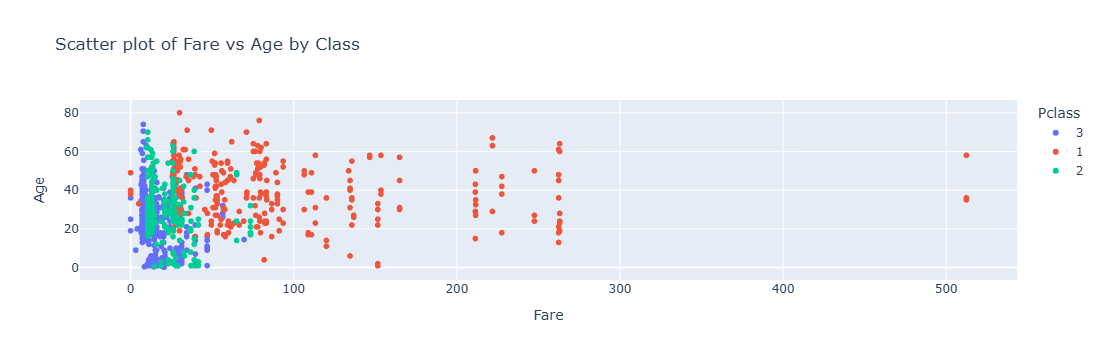

In [52]:
fig4 = px.histogram(titanic_data, x='Age', color='Survived', barmode='overlay', title='Age Distribution by Survival')
fig4.show()

fig5 = px.scatter(titanic_data, x='Fare', y='Age', color='Pclass', title='Scatter plot of Fare vs Age by Class')
fig5.show()

# Создание парных графиков

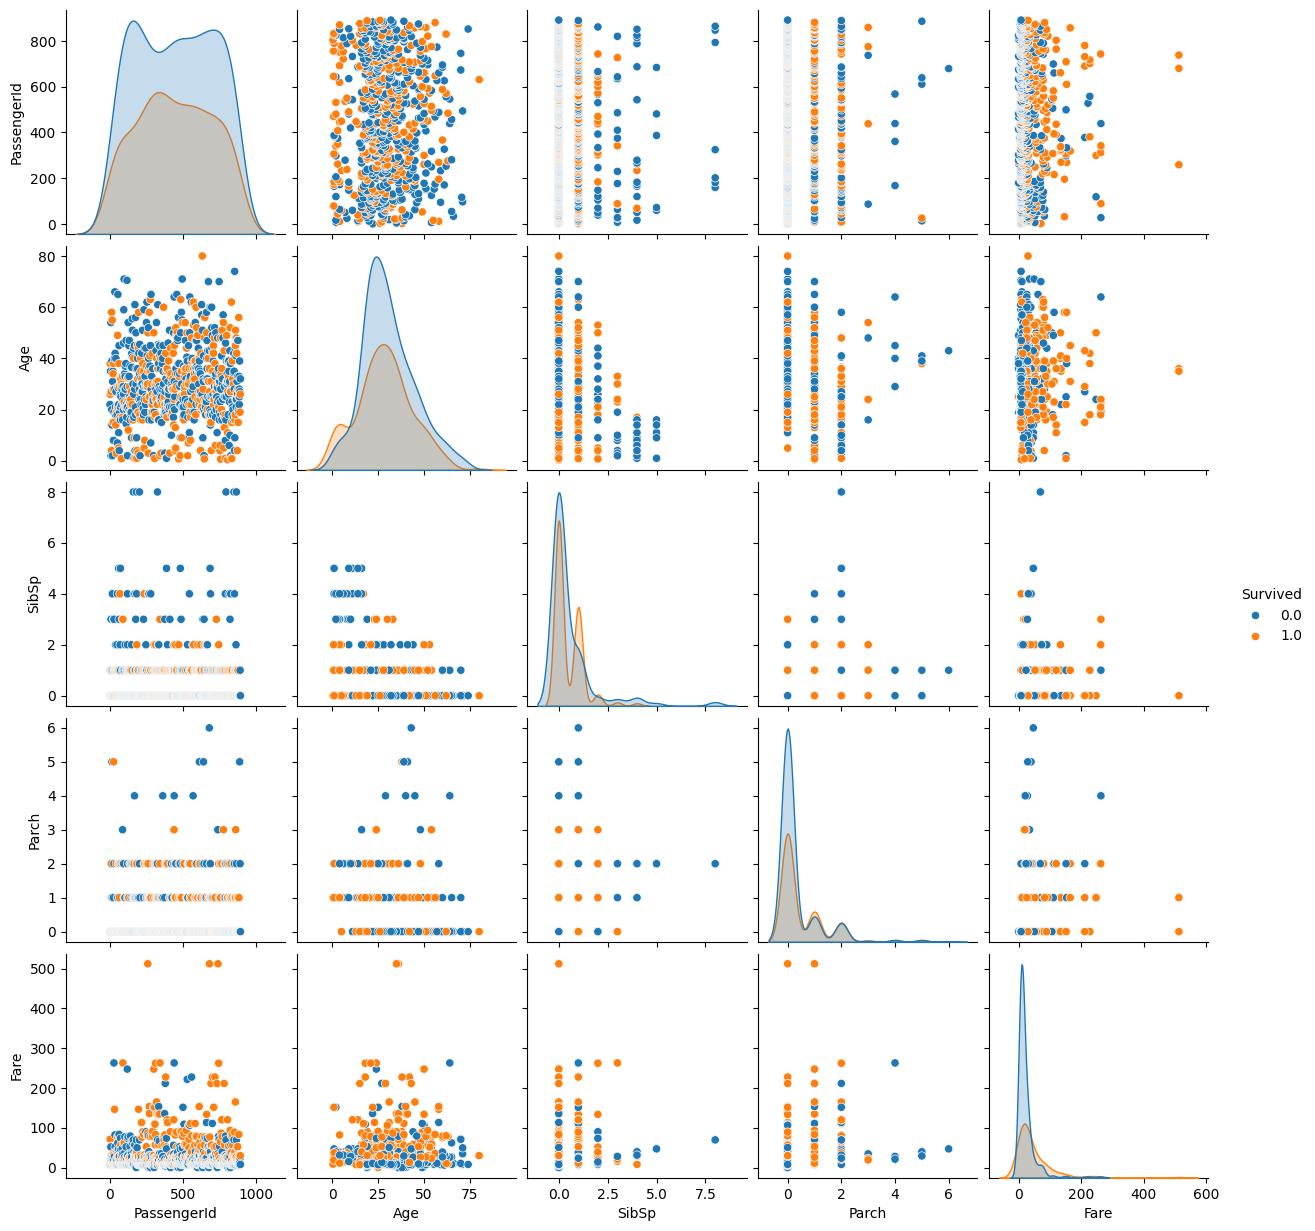

In [53]:
sns.pairplot(titanic_data, hue='Survived')
plt.show()

# Динамический график выживаемости в зависимости от возраста и класса

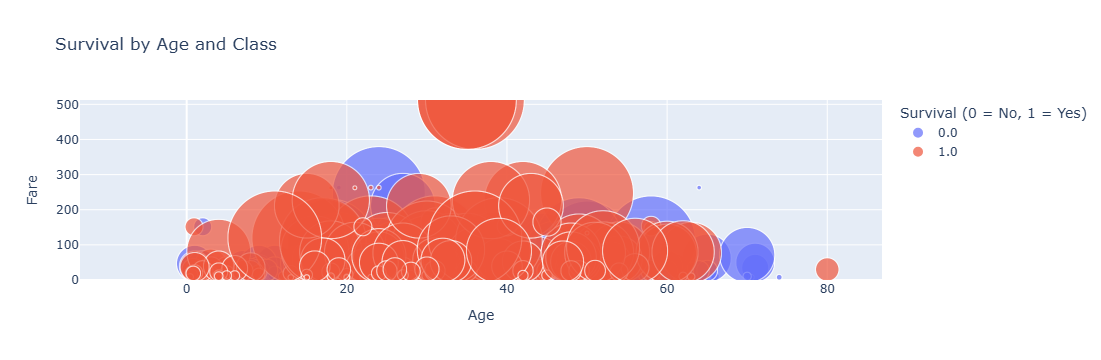

In [35]:
fig6 = px.scatter(
    titanic_data,
    x='Age',
    y='Fare',
    color='Survived',
    size='Fare',
    hover_name='Name',
    title='Survival by Age and Class',
    labels={'Survived': 'Survival (0 = No, 1 = Yes)'},
    color_continuous_scale=px.colors.sequential.Viridis
)

fig6.update_traces(marker=dict(sizemode='diameter', opacity=0.7), selector=dict(mode='markers'))

fig6.show()